In [1]:
from gurobipy import *
from math import * 
import numpy as np

In [2]:
"""

Poikonen, S., & Golden, B. (2020). 
The mothership and drone routing problem. 
INFORMS Journal on Computing, 32(2), 249-262.

https://drive.google.com/file/d/1C_4_F6HzwCA3upkeWnZ0CWkMoHHefzy5/view

"""


n=2

In [3]:
s=((14.2, 14.49), (1, 8), (2, 24),(1,49),(46,50),(48,48),(46,46),(50,48),(50,35),(30,5),(30,0));

# (26, 17), (35, 21)
# (4, 18), (27, 25)
# (1, 8), (2, 24)
orig=(14.2, 14.49)

dest=(16.06, 31.98)
R=20
alpha=2
epsilon=0.000001

In [4]:
# Create a new model
m = Model("Poikonen_2019")

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [5]:
# Create variables

cTime = {};
sTime = {};

lPoint_x= {};
lPoint_y= {};

rPoint_x= {};
rPoint_y= {};


outFlightDist = {};
inFlightDist = {};

#for SOCP
Cx= {};
Cy= {};
C= {};



w = {};

In [6]:


for i in range(0, n+1):
    
    
    outFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='outFlightDist[%s]'%i);
    inFlightDist[i] = m.addVar(lb=0.0,vtype = 'C',name='inFlightDist[%s]'%i);
    

    

for i in range(0, n+2):
    lPoint_x[i] = m.addVar(vtype = 'C',name='lPoint_x[%s]'%i);
    lPoint_y[i] = m.addVar(vtype = 'C',name='lPoint_y[%s]'%i);
    
    rPoint_x[i] = m.addVar(vtype = 'C',name='rPoint_x[%s]'%i);
    rPoint_y[i] = m.addVar(vtype = 'C',name='rPoint_y[%s]'%i);
    
    cTime[i] = m.addVar(lb=0.0,vtype = 'C',name='cTime[%s]'%i);
    
    sTime[i] = m.addVar(lb=0.0,vtype = 'C',name='sTime[%s]'%i);
    w[i] = m.addVar(lb=0.0,vtype = 'C',name='waitingTime[%s]'%i);

m.update()

# Add constraint

In [7]:

# Add constraint: 
ctr=0;



m.addConstr( w[0]==0);
#m.addConstr( w[n+1]==0);
#A8
m.addConstr( lPoint_x[0]==orig[0]);
m.addConstr( lPoint_y[0]==orig[1] ); 
#A9
m.addConstr( rPoint_x[0]==orig[0] ); 
m.addConstr( rPoint_y[0]==orig[1]); 
#A10
m.addConstr( lPoint_x[n+1]==dest[0]); 
m.addConstr( lPoint_y[n+1]==dest[1] ); 
#A11
m.addConstr( rPoint_x[n+1]==dest[0]); 
m.addConstr( rPoint_y[n+1]==dest[1]); 

for k in range(0, n+1):
    #A2
    
    
    #FOR ABBA
    if k==1:
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A2');
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A2');
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A2');
    
    
        m.addConstr( Cx[ctr]  == rPoint_x[2] - rPoint_x[1], 'A2x.1'); 
        m.addConstr( Cy[ctr]  == rPoint_y[2] - rPoint_y[1], 'A2y.1');
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A2.2');
        m.addConstr( C[ctr]+sTime[2]-cTime[1]  == 0, 'A2.3');
        
        
    else:
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A2');
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A2');
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A2');
    
    
        m.addConstr( Cx[ctr]  == lPoint_x[k+1] - rPoint_x[k], 'A2x.1'); 
        m.addConstr( Cy[ctr]  == lPoint_y[k+1] - rPoint_y[k], 'A2y.1');
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A2.2');
        m.addConstr( C[ctr]-cTime[k]   == 0, 'A2.3');
    """
    
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A2');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A2');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A2');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k+1] - rPoint_x[k], 'A2x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k+1] - rPoint_y[k], 'A2y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A2.2');
    m.addConstr( C[ctr]-cTime[k]   == 0, 'A2.3');
    
    """
    
    
    #A3
    """
    #FOR ABAB
    if k==1:
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3.1');
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3.1');
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3.1');
        
        m.addConstr( Cx[ctr]  == lPoint_x[1] - lPoint_x[2], 'A3x.1.1'); 
        m.addConstr( Cy[ctr]  == lPoint_y[1] - lPoint_y[2], 'A3y.1.1');
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2.1');
        
        m.addConstr( C[ctr]+cTime[1]-sTime[1] -w[1]  == 0, 'A2.3');
        #m.addConstr( C[ctr]+cTime[1]-sTime[1]   == 0, 'A2.3');
    
    elif k==2:
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3.2');
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3.2');
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3.2');
        
        m.addConstr( Cx[ctr]  == rPoint_x[1] - rPoint_x[2], 'A3x.1.2'); 
        m.addConstr( Cy[ctr]  == rPoint_y[1] - rPoint_y[2], 'A3y.1.2');
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2.2');
        
        m.addConstr( C[ctr]+cTime[1]-sTime[1] -w[1]   == 0, 'A2.4');
        #m.addConstr( C[ctr]+cTime[1]-sTime[1]   == 0, 'A2.4');
        
        
        
        
    else:
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3');
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3');
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3');
    
    
        m.addConstr( Cx[ctr]  == lPoint_x[k] - rPoint_x[k], 'A3x.1'); 
        m.addConstr( Cy[ctr]  == lPoint_y[k] - rPoint_y[k], 'A3y.1');
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2');
        m.addConstr( C[ctr]-sTime[k] -w[k]   == 0, 'A3.3');
        #m.addConstr( C[ctr]-sTime[k]   == 0, 'A3.3');
    
    """
    
    #FOR ABBA
    if k==1:
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3.1');
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3.1');
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3.1');
        
        m.addConstr( Cx[ctr]  == lPoint_x[1] - lPoint_x[2], 'A3x.1.1'); 
        m.addConstr( Cy[ctr]  == lPoint_y[1] - lPoint_y[2], 'A3y.1.1');
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2.1');
        
        m.addConstr( C[ctr]+cTime[1]-sTime[1] -w[1]  == 0, 'A2.3');
        #m.addConstr( C[ctr]+cTime[1]-sTime[1]   == 0, 'A2.3');
    
    else:
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3');
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3');
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3');
    
    
        m.addConstr( Cx[ctr]  == lPoint_x[k] - rPoint_x[k], 'A3x.1'); 
        m.addConstr( Cy[ctr]  == lPoint_y[k] - rPoint_y[k], 'A3y.1');
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2');
        m.addConstr( C[ctr]-sTime[k]  -w[k] == 0, 'A3.3');
        #m.addConstr( C[ctr]-sTime[k]  == 0, 'A3.3');
    
    
    """
    
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A3');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A3');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A3');
    
    
    m.addConstr( Cx[ctr]  == lPoint_x[k] - rPoint_x[k], 'A3x.1'); 
    m.addConstr( Cy[ctr]  == lPoint_y[k] - rPoint_y[k], 'A3y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A3.2');
    m.addConstr( C[ctr]-sTime[k]  -w[k] == 0, 'A3.3');
    #m.addConstr( C[ctr]-sTime[k]  == 0, 'A3.3');
    """
    #A4
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A4');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A4');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A4');
    
    
    m.addConstr( Cx[ctr]  == s[k][0] - lPoint_x[k], 'A4x.1'); 
    m.addConstr( Cy[ctr]  == s[k][1] - lPoint_y[k], 'A4y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A4.2');
    m.addConstr( C[ctr]-outFlightDist[k]   == 0, 'A4.3'); 
    
    #A5
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.A5');
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.A5');
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.A5');
    
    
    m.addConstr( Cx[ctr]  == s[k][0] - rPoint_x[k], 'A5x.1'); 
    m.addConstr( Cy[ctr]  == s[k][1] - rPoint_y[k], 'A5y.1');
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'A5.2');
    m.addConstr( C[ctr]-inFlightDist[k]   == 0, 'A5.3'); 
    
    
    #A6
    #m.addConstr( (outFlightDist[k] + inFlightDist[k])/alpha   <= sTime[k], 'A6'); 
    m.addConstr( (outFlightDist[k] + inFlightDist[k])  <= sTime[k]*alpha, 'A6'); 
    
    #A7
    m.addConstr( sTime[k]   <= R, 'A7'); 
    
    
    
    
    
    

# Set objective:

In [8]:
# Set objective:


obj = quicksum(((1+epsilon)*(cTime[k]+sTime[k])+w[k] ) for k in range(0,n+2))-2*sTime[2]



#(cTime[k]+sTime[k])+w[k]) 
#ABAB
#-2*cTime[1]

#ABBA
#-2*sTime[2]

m.setObjective(obj,GRB.MINIMIZE)

In [9]:
m.optimize()

Optimize a model with 51 rows, 70 columns and 110 nonzeros
Optimize a model with 51 rows, 70 columns and 110 nonzeros
Model has 12 quadratic constraints
Model has 12 quadratic constraints
Coefficient statistics:
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Matrix range     [1e+00, 2e+00]
  QMatrix range    [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+01]
  RHS range        [1e+00, 3e+01]
Presolve removed 35 rows and 35 columns
Presolve removed 35 rows and 35 columns
Presolve time: 0.02s
Presolve time: 0.02s
Presolved: 24 rows, 35 columns, 53 nonzeros
Presolved: 24 rows, 35 columns, 53 nonzeros
Presolved model has 9 second-order cone constraints
Presolved model has 9 second-order cone constraints
Ordering time: 0.00s
Ordering time: 0.00s


Barrier statistics:
Barrier statistics:
 AA' NZ     : 8.600e+01
 A

In [10]:
def distance(query, target):
    x_dist = (target[0] - query[0])**2
    y_dist = (target[1] - query[1])**2
    dist = np.sqrt(x_dist + y_dist )
    return dist

In [11]:
#ABBA
d=distance(orig,(lPoint_x[1].X,lPoint_y[1].X))+distance((lPoint_x[2].X,lPoint_y[2].X),(lPoint_x[1].X,lPoint_y[1].X))+distance((lPoint_x[2].X,lPoint_y[2].X),(rPoint_x[2].X,rPoint_y[2].X))+distance((rPoint_x[1].X,rPoint_y[1].X),(rPoint_x[2].X,rPoint_y[2].X))+distance((rPoint_x[1].X,rPoint_y[1].X),dest)



#ABAB
#d=distance(orig,(lPoint_x[1].X,lPoint_y[1].X))+distance((lPoint_x[2].X,lPoint_y[2].X),(lPoint_x[1].X,lPoint_y[1].X))+distance((lPoint_x[2].X,lPoint_y[2].X),(rPoint_x[1].X,rPoint_y[1].X))+distance((rPoint_x[2].X,rPoint_y[2].X),(rPoint_x[1].X,rPoint_y[1].X))+distance((rPoint_x[2].X,rPoint_y[2].X),dest)




#AABB
#d=distance(orig,(lPoint_x[1].X,lPoint_y[1].X))+distance((rPoint_x[1].X,rPoint_y[1].X),(lPoint_x[1].X,lPoint_y[1].X))+distance((lPoint_x[2].X,lPoint_y[2].X),(rPoint_x[1].X,rPoint_y[1].X))+distance((rPoint_x[2].X,rPoint_y[2].X),(lPoint_x[2].X,lPoint_y[2].X))+distance((rPoint_x[2].X,rPoint_y[2].X),dest)


In [12]:
import matplotlib.pyplot as plt

obj: 23.026077909015754 with waiting time
length: 22.902620342174124 km
obj: 23.026077909015754 with waiting time
length: 22.902620342174124 km


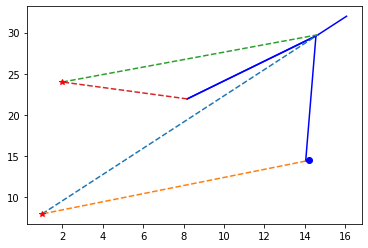

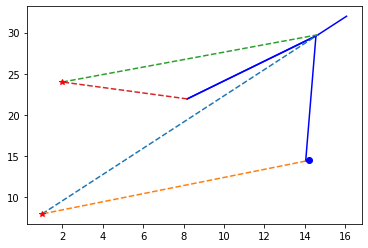

In [13]:

obj = m.getObjective()
print("obj:",obj.getValue(), "with waiting time")
print("length:",d, "km")
#plt.xlabel("x/km")
#plt.ylabel("y/km")

plt.plot([lPoint_x[1].X, orig[0]],[lPoint_y[1].X,  orig[1]], color= 'b')
plt.plot([rPoint_x[n].X, dest[0]],[rPoint_y[n].X,  dest[1]], color= 'b')

for i in range(1,n+1):
    plt.plot([lPoint_x[i].X, rPoint_x[i].X],[lPoint_y[i].X,  rPoint_y[i].X], color= 'b')
    if i<n:
        plt.plot([lPoint_x[i+1].X, rPoint_x[i].X],[lPoint_y[i+1].X,  rPoint_y[i].X], color= 'b')


for i in range(1,n+1):
    plt.plot([s[i][0] ,  rPoint_x[i].X] ,[s[i][1],  rPoint_y[i].X],linestyle= '--')
    plt.plot([lPoint_x[i].X, s[i][0]],[lPoint_y[i].X,  s[i][1]],linestyle= '--')
    plt.plot(s[i][0], s[i][1], marker='*',color='r')

plt.plot(s[0][0], s[0][1], marker='o',color='b')


obj: 23.026077909015754 with waiting time +epsilon
length: 22.902620342174124 km
obj: 23.026077909015754 with waiting time +epsilon
length: 22.902620342174124 km


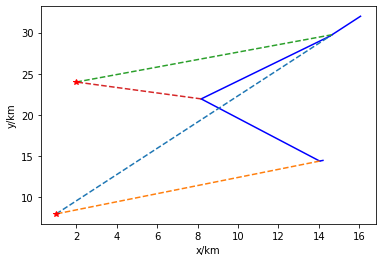

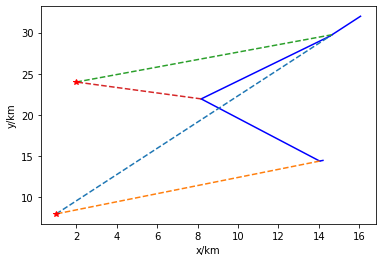

In [14]:
obj = m.getObjective()
print("obj:",obj.getValue(), "with waiting time +epsilon")
#with waiting time+epsilon
print("length:",d, "km")
import matplotlib.pyplot as plt
plt.xlabel("x/km")
plt.ylabel("y/km")

plt.plot([lPoint_x[1].X, orig[0]],[lPoint_y[1].X,  orig[1]], color= 'b')
plt.plot([rPoint_x[n].X, dest[0]],[rPoint_y[n].X,  dest[1]], color= 'b')


plt.plot([lPoint_x[1].X, lPoint_x[2].X],[lPoint_y[1].X,  lPoint_y[2].X], color= 'b')
plt.plot([rPoint_x[1].X, lPoint_x[2].X],[rPoint_y[1].X,  lPoint_y[2].X], color= 'b')
plt.plot([rPoint_x[1].X, rPoint_x[2].X],[rPoint_y[1].X,  rPoint_y[2].X], color= 'b')

for i in range(1,n+1):
    plt.plot([s[i][0] ,  rPoint_x[i].X] ,[s[i][1],  rPoint_y[i].X],linestyle= '--')
    plt.plot([lPoint_x[i].X, s[i][0]],[lPoint_y[i].X,  s[i][1]],linestyle= '--')
    plt.plot(s[i][0], s[i][1], marker='*',color='r')

In [15]:
w

{0: <gurobi.Var waitingTime[0] (value 0.0)>,
 1: <gurobi.Var waitingTime[1] (value 3.904001391967152e-09)>,
 2: <gurobi.Var waitingTime[2] (value 3.903998866925899e-09)>,
 3: <gurobi.Var waitingTime[3] (value 0.0)>}

{0: <gurobi.Var waitingTime[0] (value 0.0)>,
 1: <gurobi.Var waitingTime[1] (value 3.904001391967152e-09)>,
 2: <gurobi.Var waitingTime[2] (value 3.903998866925899e-09)>,
 3: <gurobi.Var waitingTime[3] (value 0.0)>}

In [16]:
lPoint_x

{0: <gurobi.Var lPoint_x[0] (value 14.2)>,
 1: <gurobi.Var lPoint_x[1] (value 14.038746798971657)>,
 2: <gurobi.Var lPoint_x[2] (value 8.17683666787969)>,
 3: <gurobi.Var lPoint_x[3] (value 16.06)>}

{0: <gurobi.Var lPoint_x[0] (value 14.2)>,
 1: <gurobi.Var lPoint_x[1] (value 14.038746798971657)>,
 2: <gurobi.Var lPoint_x[2] (value 8.17683666787969)>,
 3: <gurobi.Var lPoint_x[3] (value 16.06)>}

In [17]:
lPoint_y

{0: <gurobi.Var lPoint_y[0] (value 14.49)>,
 1: <gurobi.Var lPoint_y[1] (value 14.410789654376611)>,
 2: <gurobi.Var lPoint_y[2] (value 21.952940891179775)>,
 3: <gurobi.Var lPoint_y[3] (value 31.98)>}

{0: <gurobi.Var lPoint_y[0] (value 14.49)>,
 1: <gurobi.Var lPoint_y[1] (value 14.410789654376611)>,
 2: <gurobi.Var lPoint_y[2] (value 21.952940891179775)>,
 3: <gurobi.Var lPoint_y[3] (value 31.98)>}

In [18]:
rPoint_x

{0: <gurobi.Var rPoint_x[0] (value 14.2)>,
 1: <gurobi.Var rPoint_x[1] (value 14.545854096678621)>,
 2: <gurobi.Var rPoint_x[2] (value 14.65155640384193)>,
 3: <gurobi.Var rPoint_x[3] (value 16.06)>}

{0: <gurobi.Var rPoint_x[0] (value 14.2)>,
 1: <gurobi.Var rPoint_x[1] (value 14.545854096678621)>,
 2: <gurobi.Var rPoint_x[2] (value 14.65155640384193)>,
 3: <gurobi.Var rPoint_x[3] (value 16.06)>}

In [19]:
rPoint_y

{0: <gurobi.Var rPoint_y[0] (value 14.49)>,
 1: <gurobi.Var rPoint_y[1] (value 29.56976710727421)>,
 2: <gurobi.Var rPoint_y[2] (value 29.73797250040447)>,
 3: <gurobi.Var rPoint_y[3] (value 31.98)>}

{0: <gurobi.Var rPoint_y[0] (value 14.49)>,
 1: <gurobi.Var rPoint_y[1] (value 29.56976710727421)>,
 2: <gurobi.Var rPoint_y[2] (value 29.73797250040447)>,
 3: <gurobi.Var rPoint_y[3] (value 31.98)>}

In [20]:
cTime[1]

<gurobi.Var cTime[1] (value 10.431371083335547)>

<gurobi.Var cTime[1] (value 10.431371083335547)>

In [21]:
sTime[2].X + distance((rPoint_x[1].X,rPoint_y[1].X),(rPoint_x[2].X,rPoint_y[2].X))

10.431371080942288

10.431371080942288

In [25]:
sTime

{0: <gurobi.Var sTime[0] (value 1.561597039873519e-08)>,
 1: <gurobi.Var sTime[1] (value 19.999999996095998)>,
 2: <gurobi.Var sTime[2] (value 10.23271048591209)>,
 3: <gurobi.Var sTime[3] (value 0.0)>}

In [36]:
10.23271048591209-(distance(s[2],(lPoint_x[2].X,lPoint_y[2].X))+distance(s[2],(rPoint_x[2].X,rPoint_y[2].X)))/2

0.03313245014538779

In [28]:
(lPoint_x[1],lPoint_y[1])

In [22]:
import numpy as np

In [23]:
a

NameError: name 'a' is not defined

NameError: name 'a' is not defined

In [ ]:
w

In [ ]:
#AABB
d=distance(orig,(lPoint_x[1].X,lPoint_y[1].X))+distance((rPoint_x[1].X,rPoint_y[1].X),(lPoint_x[1].X,lPoint_y[1].X))+distance((lPoint_x[2].X,lPoint_y[2].X),(rPoint_x[1].X,rPoint_y[1].X))+distance((rPoint_x[2].X,rPoint_y[2].X),(lPoint_x[2].X,lPoint_y[2].X))+distance((rPoint_x[2].X,rPoint_y[2].X),dest)